<h1>Adaptive Boosting (AdaBoost Model) in Classification</h1>
<h3>We will be using the Adaptive boosting algorithm implementation in the Scikit-Learn Library.</h3>
<br>In this notebook, we will construct the Adaptive Boosting Classifier Model to help us classify a salary class based on our selected features.
<br>The scikit-learn library provides the Adaptive Boosting algorithm for classification via the AdaBoostClassifier class.
<br>In our previous initial model, the Decision Tree Classifier, the optimal model provided a f1 score is 0.53621. Hence, we will use that score as a benchmark to improve on.
<br> 
<br>AdaBoost is used as an Ensemble Method under the broad family of Machine Learning. It initially builds a model by giving all data points equal weights and then assigns higher weighted weights to the data points that are incorrectly classified (points with low accuracy and are referred to as weak learners), so that these data points are given a higher importance in the next instantiation of the model. This eventually leads to a model that focuses more and more on the mistakes so that it gives a higher accuracy, and is then refered to as a strong learner.

<br> ref.: https://vagifaliyev.medium.com/adaptive-boosting-simply-explained-through-python-eebdb988de66

<b>Importing of all essential libraries</b>

In [24]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we need pyplot
import seaborn as sb


from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
sb.set() # set the default Seaborn style for graphics


<b>Importing our train and test datasets</b>

In [25]:
X_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

X_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

X_testEGIN = pd.read_csv('Data/x_testEGIN.csv')
X_trainEGIN = pd.read_csv('Data/x_trainEGIN.csv')

<b>Checking our train and test datasets</b>

In [26]:
print("==================x_test==================")
X_test.info()
print("\n==================x_train==================")
X_train.info()

print("\n==================y_test==================")
y_test.info()
print("\n==================y_train==================")
y_train.info()

print("==================EGIN_x_test==================")
X_testEGIN.info()
print("\n==================EGIN_x_train==================")
X_trainEGIN.info()

==================x_test==================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12799 entries, 0 to 12798
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Education                            12799 non-null  int64
 1   Marital                              12799 non-null  int64
 2   Sex                                  12799 non-null  int64
 3   Age                                  12799 non-null  int64
 4   Race                                 12799 non-null  int64
 5   Veteran                              12799 non-null  int64
 6   Pro_Cert                             12799 non-null  int64
 7   Gov_Cert                             12799 non-null  int64
 8   Cert_Need                            12799 non-null  int64
 9   Disability                           12799 non-null  int64
 10  Citizenship                          12799 non-null  int64
 11  Last Week W

<b>Creating a Initial Base Model (Model Evaluation with fixed values of hyperparameters)</b>

<b>Our problem falls under the category of multi-class classification. The Base Model Evaluation will be done with a fixed set of values of hyperparameters for the classlification problem. We will intially set the following hyperparameters that are comparative to the other ML models used: 300 estimators (meaning AdaBoost will use 300 weak learners in the dataset), a default learning rate of 1.0 (as advised in the Adaboost Documentation) and lastly we will be using the SAMME.R alogorithm, which uses the probability estimates to update the additive model and generally converges faster than the latter SAMME algorithm.</b>

In [27]:
#creating Adaboost classifier obj and printing out the base model's parameters
ada_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, n_estimators= 300)

print(ada_clf.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 300, 'random_state': None}


<b>Training the Initial Base Model with the data from our regular dataset (non-feature engineered dataset)</b>

F1 Score for Train Data: 0.5622909872886156
F1 Score for Test Data: 0.5646477450771377

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.75      0.63      0.68      3276
           2       0.46      0.50      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.64      0.65      0.65      3100

    accuracy                           0.56     12799
   macro avg       0.57      0.56      0.56     12799
weighted avg       0.57      0.56      0.56     12799



<AxesSubplot:>

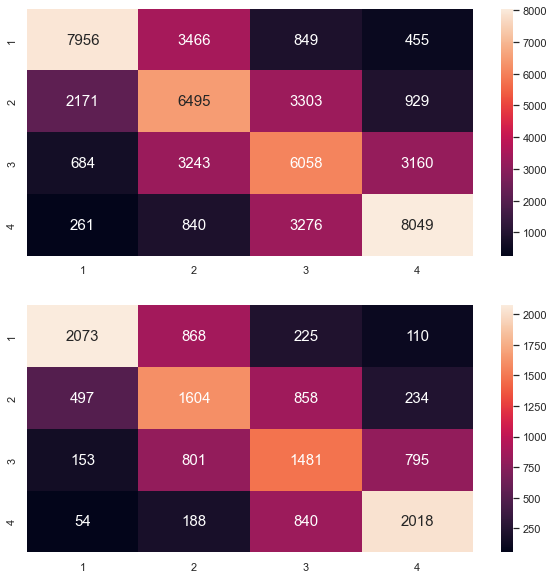

In [28]:
#train Adaboost model with non-EGIN values
model_nonEGIN = ada_clf.fit(X_train, y_train.values.ravel())

y_pred_test = model_nonEGIN.predict(X_test)
y_pred_train = model_nonEGIN.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>Training the Initial Base Model with the data from our feature engineered dataset</b>

F1 Score for Train Data: 0.5620231201701209
F1 Score for Test Data: 0.5627055986583127

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.63      0.68      3276
           2       0.46      0.50      0.48      3193
           3       0.43      0.46      0.45      3230
           4       0.64      0.65      0.64      3100

    accuracy                           0.56     12799
   macro avg       0.57      0.56      0.56     12799
weighted avg       0.57      0.56      0.56     12799



<AxesSubplot:>

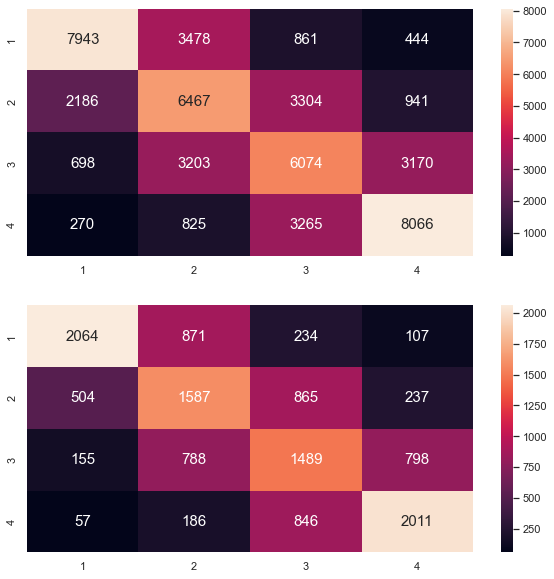

In [29]:
#train gradient boost model with EGIN values
model_EGIN = ada_clf.fit(X_trainEGIN, y_train.values.ravel())

y_pred_testEGIN = model_EGIN.predict(X_testEGIN)
y_pred_trainEGIN = model_EGIN.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>Insights</b>
<br>We see that the Base Scikit-Learn AdaBoosting classifier for both the regular (f1-score=0.56464) and feature engineered (f1-score=0.56271) datasets do appear to perform significantly better than our previous decision tree classifier(f1-score=0.53621). (Note: We are comparing the f1 scores for the test data between models)
<br>
<br> Between the regular and feature engineered datasets, the difference in the f1 scores does differ by a slight margin so we can see how for this model, feature engineering does not help much, and in fact gives a slightly lower f1 score than the regular dataset (diff=0.00193). 
<br>
<br>Checking for Overfitting: Both the training and test set accuracy are quite comparable. So, we can assume that there is little overfitting. However, looking deeper into the train and test f1 scores, we can see an interesting observation with how the test accuracy via the f1 score is slightly higher for the test than train accuracy for both datasets. However, this could just be an anomaly as theoretically, it is still possible to have a higher test accuracy than the validation accuracy, possibly due to a slight difference in underlying distribution in datasets Ref: https://stackoverflow.com/questions/61519021/can-test-accuracy-be-greater-than-validation-accuracy
<br>
<br>We will now further finetune our regular model's hyperparameters to improve the model’s performance

<h3>Hyperparameters Tuning</h3>

For our model, we can tune the number of trees or weak learners in the model <b>(n_estimators)</b>, we can explore the weak learners too with the depth of the decision trees in the model <b>(max_depth)</b> and explore the learning rates that controls the loss functions used for calculating the weights of the base models <b>(learning_rate)</b>. We can note how the learning rate is directly correlated with the number of n/-estimators. It’s value is optimally around the 1.0 value. With a larger number of n_estimators, we normally utilize a smaller learning rate value.

<br>
We will use <b>RandomSearchCV</b> to obtain the optimal hyperparameters through a cross validation process.


<b>Importing the RandomSearchCV function from sklearn</b>

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

<b>Obtaining optimal hyperparameters through cross validation using RandomSearchCV</b>
<br>
<br>For the AdaBooster, there are 3 main hyperparameters we can tune: (n_estimators), (max_depth) & (learning_rate).
<br>An extensive list can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
<br>
<br>We selected to tune only 2 of the 3 hyperparameters with a specified range (found through research and documentation on the scikit learn website) to find the model with the best performance (we did not add max_depth in the parameter list as hyper tuning of the parameters fails when both the n_estimators and max_depth are randomly changed during different iterations as seen through previous tests due to a specific range they need to be in in order for the RandomSearchCV to run for AdaBoost. Thus, since this was restricting us from trying various different set of parameters, we decided to only focus on tuning the n_estimators and learning_rate for our model).
<br>
<br>We are using RandomSearchCV as it is generally very effective in finding the best parameters to improve our model. It conducts randomised searches, where all the other parameters are held constant while only the parameters we are testing and tuning are variable. It is generally computationally less expensive than GridSearchCV and is faster, so it is better suited for the hardware our team is using to train the models. As we are not changing too many variables, it is faster, while also giving us a good estimation of the optimal parameters for our model.

In [77]:
#Parameter tuning with RandomSearchCV 
# define model
est_ada = AdaBoostClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space 
parameters = {
    'n_estimators': [x for x in range(400,1050, 50)],
    'learning_rate': np.linspace(0.001,1.25,50),
}

# define search
RS_ada = RandomizedSearchCV(estimator=est_ada, param_distributions=parameters, scoring = 'f1_macro', n_jobs = -1, cv = cv, n_iter=50)
print(RS_ada)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-03, 2.64897959e-02, 5.19795918e-02, 7.74693878e-02,
       1.02959184e-01, 1.28448980e-01, 1.53938776e-01, 1.79428571e-01,
       2.04918367e-01, 2.30408163e-01, 2.55897959e-01, 2.81387755e-01,
       3.06877551e-01, 3.32367347e-01, 3.57857143e-01, 3.8334...
       8.16673469e-01, 8.42163265e-01, 8.67653061e-01, 8.93142857e-01,
       9.18632653e-01, 9.44122449e-01, 9.69612245e-01, 9.95102041e-01,
       1.02059184e+00, 1.04608163e+00, 1.07157143e+00, 1.09706122e+00,
       1.12255102e+00, 1.14804082e+00, 1.17353061e+00, 1.19902041e+00,
       1.22451020e+00, 1.25000000e+00]),
                                        'n_estimators': [400, 450, 500, 550,
                                                         600, 650, 700, 750,
                                                         800, 850, 900, 950,
                              

In [78]:
tunedmodel_nonEGIN = RS_ada.fit(X_train, y_train.values.ravel())

In [79]:
#Print all iterations run with RandomSearchCV
#Rank the iterations by the mean_test_score they produce for each test to see the best few tests and their respetive parameters
temp_df= pd.DataFrame(tunedmodel_nonEGIN.cv_results_)

temp_df[["mean_test_score", "rank_test_score", "param_n_estimators", "param_learning_rate", "params"]].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score,param_n_estimators,param_learning_rate,params
16,0.562570,1,1000,0.867653,"{'n_estimators': 1000, 'learning_rate': 0.8676..."
47,0.562228,2,1000,1.071571,"{'n_estimators': 1000, 'learning_rate': 1.0715..."
15,0.561806,3,800,0.918633,"{'n_estimators': 800, 'learning_rate': 0.91863..."
1,0.561748,4,850,1.122551,"{'n_estimators': 850, 'learning_rate': 1.12255..."
30,0.561415,5,900,1.22451,"{'n_estimators': 900, 'learning_rate': 1.22451..."
27,0.561392,6,950,0.765694,"{'n_estimators': 950, 'learning_rate': 0.76569..."
38,0.560846,7,550,1.22451,"{'n_estimators': 550, 'learning_rate': 1.22451..."
22,0.560611,8,800,0.969612,"{'n_estimators': 800, 'learning_rate': 0.96961..."
45,0.560506,9,850,0.969612,"{'n_estimators': 850, 'learning_rate': 0.96961..."
42,0.560492,10,650,1.122551,"{'n_estimators': 650, 'learning_rate': 1.12255..."


In [80]:
#Print the iteration run on RandomSearchCV and print it's parameters
print('Best parameters after tuning hyperparameters: ', tunedmodel_nonEGIN.best_params_ ) 
print('Best F1 score after tuning hyperparameters: ', tunedmodel_nonEGIN.best_score_ ) 

Best parameters after tuning hyperparameters:  {'n_estimators': 1000, 'learning_rate': 0.8676530612244899}
Best F1 score after tuning hyperparameters:  0.5625700701281433


<h3>Optimal Model</h3>

<br> Based on the RandomSearchCV results, we can now build the model with the optimal hyperparamters of 'n_estimators': 1000 and 'learning_rate': 0.8676530612244899

In [83]:
#creating Adaboost classifier obj and printing out the tuned model's parameters
ada_clf1 = AdaBoostClassifier(learning_rate= 0.8676530612244899, n_estimators= 1000)

print(ada_clf1.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.8676530612244899, 'n_estimators': 1000, 'random_state': None}


<b>Training the Tuned Model with the data from our regular dataset (non-feature engineered dataset)</b>

F1 Score for Train Data: 0.5655126105154207
F1 Score for Test Data: 0.5666901704233265

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.64      0.69      3276
           2       0.47      0.50      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.64      0.66      0.65      3100

    accuracy                           0.56     12799
   macro avg       0.57      0.56      0.57     12799
weighted avg       0.57      0.56      0.57     12799



<AxesSubplot:>

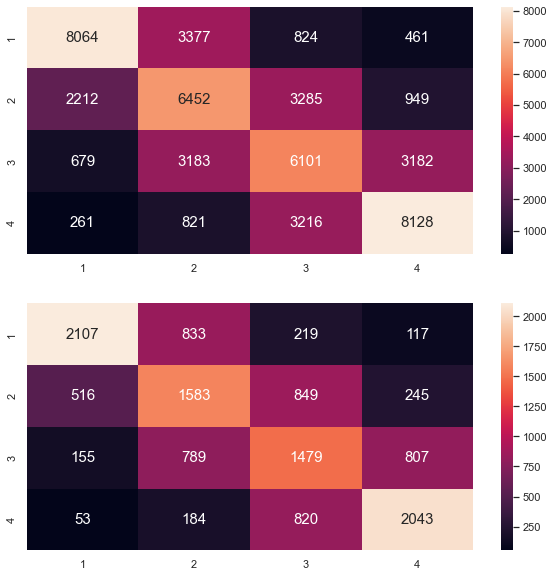

In [84]:
#train Adaboost model with non-EGIN values
model_nonEGIN1 = ada_clf1.fit(X_train, y_train.values.ravel())

y_pred_test1 = model_nonEGIN1.predict(X_test)
y_pred_train1 = model_nonEGIN1.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test1))


fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

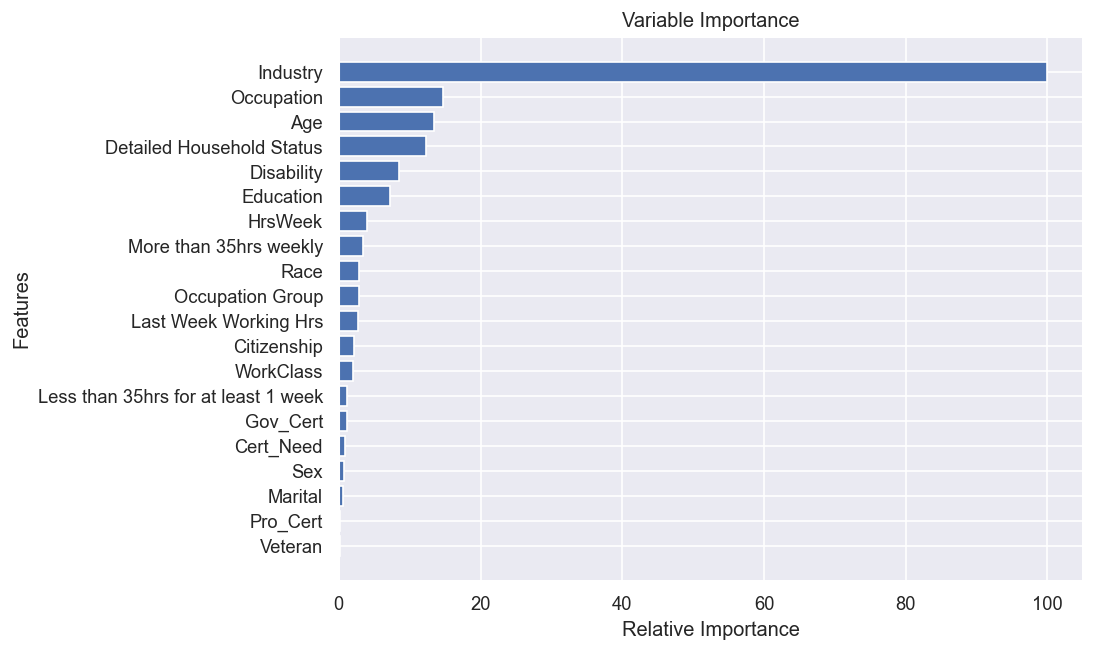

Importance of each variable in Graph above(Desc. Order):
 [100.    14.65  13.38  12.3    8.5    7.23   3.98   3.44   2.89   2.89
   2.71   2.17   1.99   1.08   1.08   0.9    0.72   0.54   0.18   0.18]


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot feature importance
feature_importance = model_nonEGIN1.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx  = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.iloc[ : , sorted_idx])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp=feature_importance
temp=np.sort(temp)
temp=np.round_(temp, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp[::-1])

<b>Training the Tuned Model with the data from our feature engineered dataset</b>

F1 Score for Train Data: 0.5659343113515793
F1 Score for Test Data: 0.5668878533987214

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.64      0.69      3276
           2       0.47      0.50      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.63      0.66      0.65      3100

    accuracy                           0.56     12799
   macro avg       0.57      0.56      0.57     12799
weighted avg       0.57      0.56      0.57     12799



<AxesSubplot:>

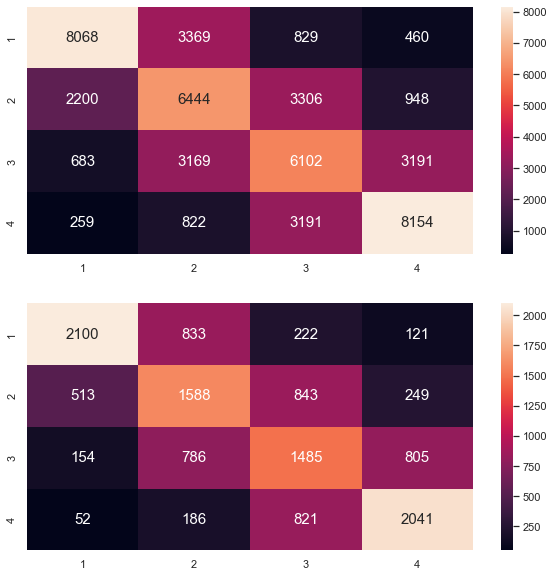

In [86]:
#train Adaboost model with EGIN values
model_EGIN1 = ada_clf1.fit(X_trainEGIN, y_train.values.ravel())

y_pred_testEGIN1 = model_EGIN1.predict(X_testEGIN)
y_pred_trainEGIN1 = model_EGIN1.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN1))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

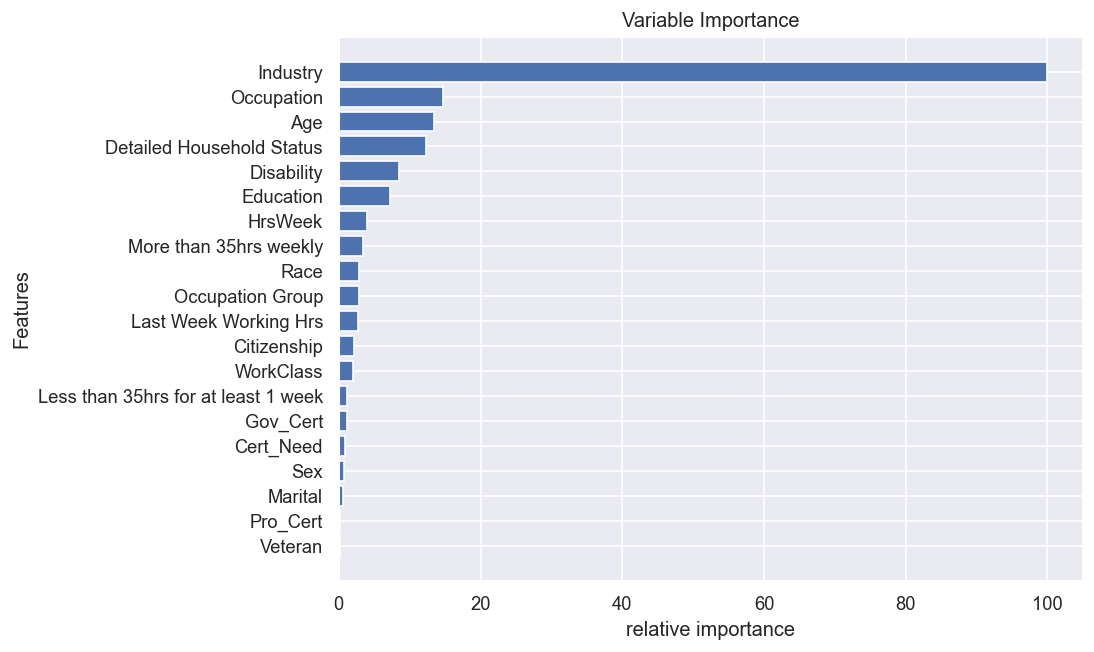

Importance of each variable in Graph above(Desc. Order):
 [100.    14.65  13.38  12.3    8.5    7.23   3.98   3.44   2.89   2.89
   2.71   2.17   1.99   1.08   1.08   0.9    0.72   0.54   0.18   0.18]


In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot features importance
feature_importance1 = model_EGIN1.feature_importances_
#make importances relative to max importance
feature_importance1 = 100.0*(feature_importance/feature_importance.max())
sorted_idx1  = np.argsort(feature_importance1)
pos1 = np.arange(sorted_idx1.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos1, feature_importance1[sorted_idx1], align='center')
plt.yticks(pos1, X_test.iloc[ : , sorted_idx1])
plt.xlabel("relative importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp1=feature_importance1
temp1=np.sort(temp1)
temp1=np.round_(temp1, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp1[::-1])

<h3>Final Insights</h3>

<b>Final Insights</b>
<ol>
<li>Results Analysis for the Random Grid Search-> After roughly 50+ iterations in the Random Grid Search with different optimal hyperparameters, we noticed only a small improvement in the f1-scores of the AdaBoost model on both the regular (f-1 score = 0.56669 after tuning vs f-1 score = 0.56464 on the initial model) and feature engineered dataset (f-1 score = 0. 56688 after tuning vs f-1 score = 0.56270 on the initial model). We believe with a more GPU-intensive hardware, we can further improve these accuracy scores by trying a higher iteration number for our Random Grid Search. </li>       
<br>
<li>Feature Engineering-> Initially the feature engineered dataset performed slightly worse than our regular dataset on the base AdaBoost Model, however after tuning our model, we saw the feature engineered dataset perform slightly better than the regular dataset. However, this gap was not significant so we could conclude that they performed roughly the same across the base and tuned model. </li>
<br>
<li>Optimal Features-> After we tuned our model, we found the most relevant features to our model and thus the most consequential features affecting a person’s salary: the industry they are working in (most significant), the occupation they are working in, the person’s age. Some features were a little less relevant to determine one’s salary: whether you are an army veteran(least significant) and whether you have a government-issued Professional Certificate</li>
<br>
<li>Checking for Overfitting: After tuning, both the training and test set accuracy do not have much of a difference in f1-scores as compared to other ML models, and thus this means that there was no overfitting of data in this model. </li>
<br>
<li>Overall Model Evaluation-> The AdaBoost Classifier does in fact perform much better than the Decision Tree but has a slightly lower f-1 accuracy score than some other ML models we implemented. Thus, due to the fact that the model might not be as accurate as the other tree-based models we used, we can conclude that this is not the best ML model that we have implemented to solve our defined problem as to what determines a person’s income. </li>
</ol>  
